In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K
import random
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.
/Users/astasik/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

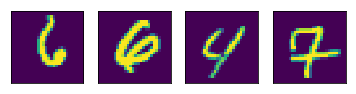

In [3]:
random_indices = [random.randint(0,50000) for x in range(5)]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x_train[random_indices[i]].reshape(28,28))
    plt.xticks([]) 
    plt.yticks([])
    
x_test_original = x_test

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
inputs = Input(shape=input_shape)
x = Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(48, kernel_size=(5, 5), strides=(1,1), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [8]:
batch_size = 128
epochs = 2

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 48s 795us/step - loss: 0.1962 - acc: 0.9409 - val_loss: 0.0573 - val_acc: 0.9817
Epoch 2/2
60000/60000 [==============================] - 40s 675us/step - loss: 0.0481 - acc: 0.9852 - val_loss: 0.0369 - val_acc: 0.9890


Test loss: 0.0369168492234312
Test accuracy: 0.989


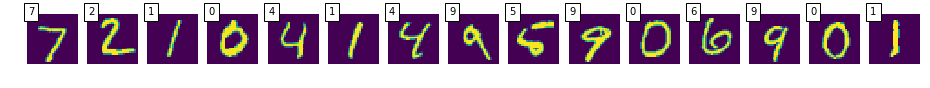

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

slice = 15
predicted = model.predict(x_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(x_test_original[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

In [10]:
json_string = model.to_json()

In [11]:
'''See https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model'''
''' Also see https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8'''

' Also see https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8'

In [12]:
model.layers[1].get_weights()[0]

array([[[[ 1.35794118e-01,  1.84842899e-01,  1.20100550e-01,
          -9.42609459e-02,  3.72004393e-03,  4.57251184e-02,
           5.19004874e-02, -5.30439168e-02,  4.24261466e-02,
           1.83776781e-01, -2.08388027e-02, -9.05957296e-02,
          -2.84099355e-02, -9.49095637e-02,  1.19938195e-01,
           6.77998364e-02, -3.46308872e-02,  1.70616489e-02,
          -6.18103519e-03,  7.83303229e-04, -1.35554031e-01,
          -3.56874056e-02, -2.18572523e-02, -3.04091405e-02,
           8.04339498e-02, -1.50579140e-01, -3.51877324e-02,
          -4.73456010e-02,  2.76686922e-02, -8.67072493e-02,
          -7.53543675e-02, -3.28252092e-02]],

        [[ 8.57777372e-02,  1.40694439e-01,  1.79105788e-03,
          -1.78309858e-01, -1.64949000e-02, -1.82482321e-02,
           3.72460149e-02,  4.81292978e-03,  2.83659194e-02,
           1.09543040e-01,  1.55334417e-02,  1.43182948e-02,
          -8.31413567e-02, -1.04186516e-02,  1.27289444e-01,
           1.56266242e-02, -1.69953480